In [44]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

from matplotlib import rcParams
from matplotlib.lines import Line2D

from adjustText import adjust_text
from itertools import product

FIGSIZE = (3, 3)
rcParams["figure.figsize"] = FIGSIZE


adata = sc.datasets.pbmc68k_reduced()

## Interfacing Matplotlib

Plots are drawn in figure objects which can conain axes objects

Some scanpoy functions also take input axes

Scanpy plots can return a figure(return_fig=True) or axes(show=False)

the show parameter regulates when the plot is rendered

Form embedding plots we can either axes or the whole figure

For every plotted caterogy one Axers object will be create for for every continuous category two Axes objects: the UMAP plot and the colorbar

If we want to use the color bar return_fig=True

When acessiung axes from a fig they are retured as a list of axes 

When an axes is directly returned it is either a single axis or a list of axes

In [6]:
# Examples of returned objects from the UMAP function

print("Categorical plots: ")
axes = sc.pl.umap(adata, color=["bulk_labels"], show=False)
print('Axis from a single category plot:', axes)
plt.close()

axes = sc.pl.umap(adata, color=["bulk_labels", "S_score"], show=False)
print("Axes list from two categorical plots:", axes)
plt.close()

fig = sc.pl.umap(adata, color=["IGJ"], show=False)
print("Axes list from a figure with one categorical plot", fig.axes)
plt.close()

print("\nContinuous plots:")
axes = sc.pl.umap(adata, color=["IGJ"], show=False)
print("Axes from one continuous plot:", axes)
plt.close()

fig = sc.pl.umap(adata, color=["IGJ"], return_fig=True)
print("Axes list from a figure of one continuopus plot:", fig.axes)
plt.close()

Categorical plots: 
Axis from a single category plot: Axes(0.125,0.11;0.775x0.77)
Axes list from two categorical plots: [<Axes: title={'center': 'bulk_labels'}, xlabel='UMAP1', ylabel='UMAP2'>, <Axes: title={'center': 'S_score'}, xlabel='UMAP1', ylabel='UMAP2'>]
Axes list from a figure with one categorical plot Axes(0.125,0.11;0.70525x0.77)

Continuous plots:
Axes from one continuous plot: Axes(0.125,0.11;0.70525x0.77)
Axes list from a figure of one continuopus plot: [<Axes: title={'center': 'IGJ'}, xlabel='UMAP1', ylabel='UMAP2'>, <Axes: label='<colorbar>'>]


Other plots are more compelx such as dotplots and have a special plot object with multiple axes

In [7]:
axes = sc.pl.dotplot(adata, ["CD79A", "MS4A1"], "bulk_labels", show=False)
print("Axes returned from dotplot object:", axes)
dp = sc.pl.dotplot(adata, ["CD79A", "MS4A1"], "bulk_labels", return_fig=True)
print("DotPlot object:", dp)
plt.close()

Axes returned from dotplot object: {'mainplot_ax': <Axes: >, 'size_legend_ax': <Axes: title={'center': 'Fraction of cells\nin group (%)'}>, 'color_legend_ax': <Axes: title={'center': 'Mean expression\nin group'}>}
DotPlot object: <scanpy.plotting._dotplot.DotPlot object at 0x000001B78805B6B0>


#### Using Matplotlinb Axes top customize plot alignment

When combingin different plots one can pass predefined matplotlib axes to some ploitting functions
This is used for custom subplot aligment or displaying two different plot types side by side

axes: [<Axes: > <Axes: >]


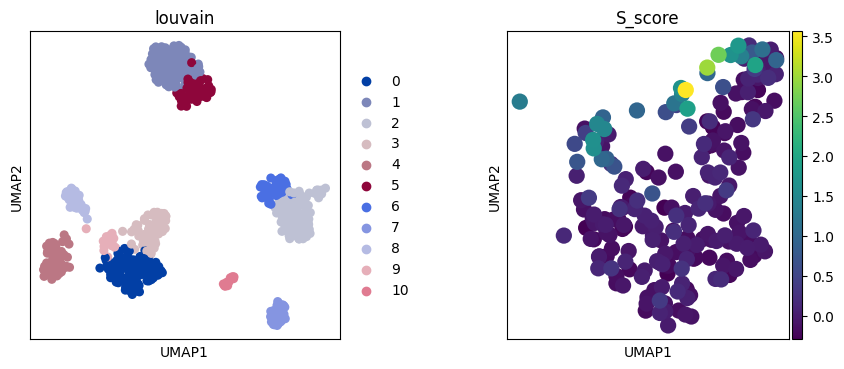

In [8]:
# Define matplotlib Axes
# Number of Axes and plot size

ncols = 2
nrows = 1
figsize = 4
wspace = 0.54
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols*figsize + figsize * wspace * (ncols-1), nrows * figsize),
)
plt.subplots_adjust(wspace=wspace)
#This prduces two Axes objects in a single figure
print("axes:", axs)

# We can use these axes objects individually to plot on them
# We need to set show=False so that the figure is not displayed before 
# we finished plotting on all axes and making all plot adjustments
sc.pl.umap(adata, color="louvain", ax=axs[0], show=False)
# Example zoom-in into a subset of louvain clusters
sc.pl.umap(
    adata[adata.obs.louvain.isin(["0", "3", "9"]), :], color="S_score", ax=axs[1]
    ) 



matplotlib also allows for differently sized axes

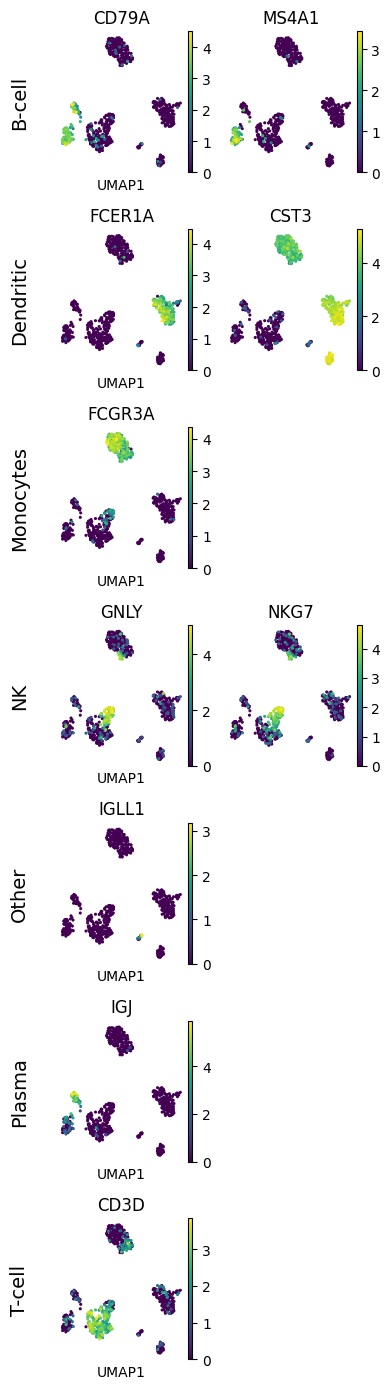

In [11]:
# In this example we want to show UMAPs of different cell type markers,
# with markers of a single cell type in one row
# and with a different number of markers per cell type (row)

# Marker genes
marker_genes = {
    "B-cell": ["CD79A", "MS4A1"],
    "Dendritic": ["FCER1A", "CST3"],
    "Monocytes": ["FCGR3A"],
    "NK": ["GNLY", "NKG7"],
    "Other": ["IGLL1"],
    "Plasma": ["IGJ"],
    "T-cell": ["CD3D"],
}

#Make Axes
#Number of needed rows and columns (based on the row with the most columns)
nrow = len(marker_genes)
ncol = max([len(vs) for vs in marker_genes.values()])
fig, axs = plt.subplots(nrow, ncol, figsize=(2 * ncol, 2 * nrow))

#plot expressions for every marker on the corresponding axes object
for row_idx, (cell_type, markers), in enumerate(marker_genes.items()):
    col_idx = 0
    for marker in markers:
        ax = axs[row_idx, col_idx]
        sc.pl.umap(adata, color=marker, ax=ax, show=False, frameon=False, s=20)
        #add cell type as row label - here it is added as ylabel of first axes in the row
        if col_idx == 0:
            #We disabled axis drawings in umap to have plots without bg or border so we need to reneable axis to plot ylabel
            ax.axis("on")
            ax.tick_params(
                top="off",
                bottom="off",
                left="off",
                right="off",
                labelleft="on",
                labelright="off",
            )
            ax.set_ylabel(cell_type + "\n", rotation=90, fontsize=14)
            ax.set(frame_on=False)
        col_idx +=1
    #Remove unused column axes from current row
    while col_idx < ncol:
        axs[row_idx, col_idx].remove()
        col_idx += 1

#Alignment within figure
fig.tight_layout()



## Plot Sizing

Plots size can be adjusted by setting rcParams['figure.figsize'], this setting is also available through scanpy's set_figure_params

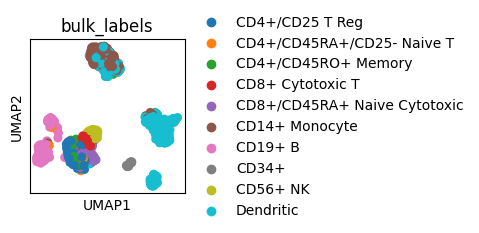

In [12]:
rcParams["figure.figsize"] = (2, 2)
sc.pl.umap(adata, color="bulk_labels")

rcParams["figure.figsize"] = FIGSIZE

We can also set rcParams for a single flot with a context manager which wont change the setting for future plots

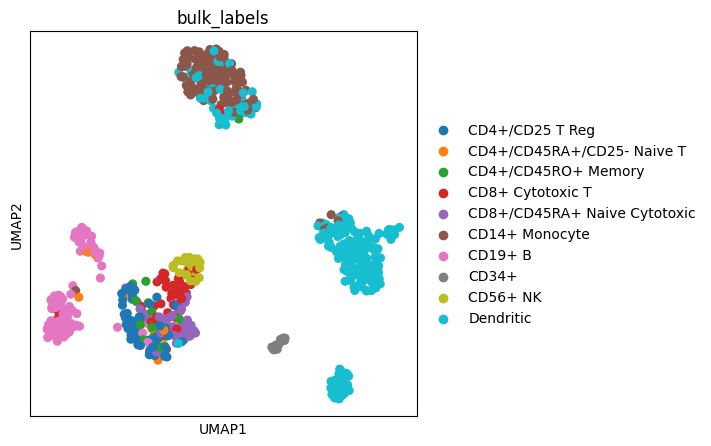

In [14]:
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(adata, color="bulk_labels")

We can also creat an axes object with a predefined size and pass it to scanpy

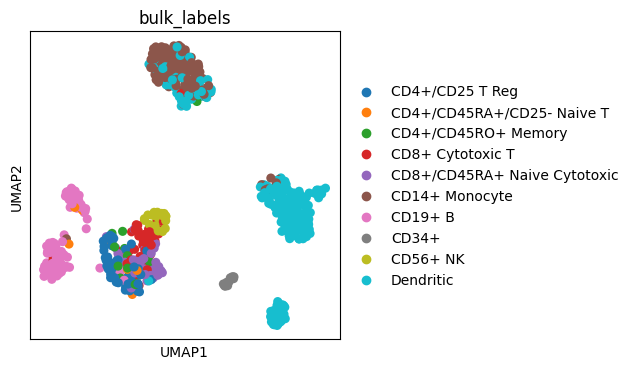

In [15]:
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.umap(adata, color="bulk_labels", ax=ax)

figsize is divided between all axes and spaces between the so if we have multiple axes we must account for this
If axes are not passed to the embveding function it will automatically create axes with the size of the current global figsize

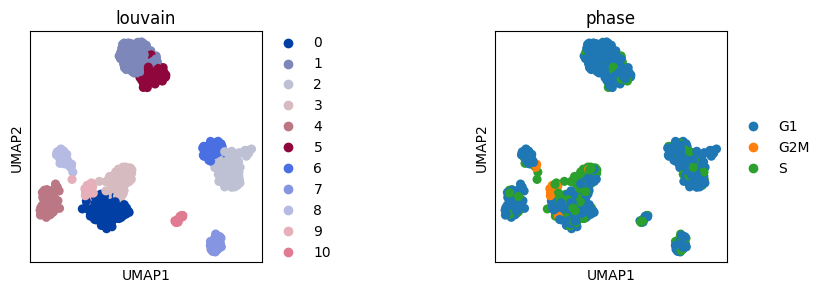

In [16]:
ncol = 2
nrow = 1
figsize =3
wspace = 1

fig, axs = plt.subplots(
    nrow, ncol, figsize=(ncol * figsize + (ncol - 1) * wspace * figsize, nrow * figsize)
)
plt.subplots_adjust(wspace=wspace)
sc.pl.umap(adata, color="louvain", ax=axs[0], show=False)
sc.pl.umap(adata, color="phase", ax=axs[1])


Whewn using pmultiple pltooes in the same row the legends may overlap. This can be solved byt setting wspace(width) or hspace(height)

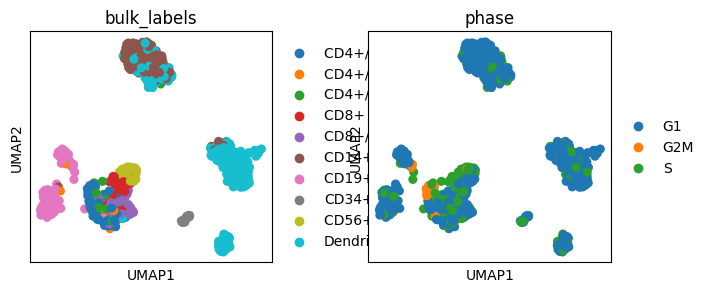

In [18]:
# Default, with overlapping
sc.pl.umap(adata, color=["bulk_labels", "phase"])

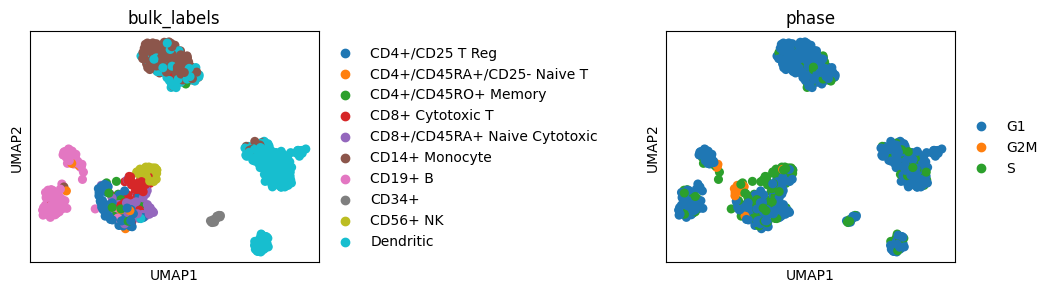

In [19]:
# Increase gap size between plots
sc.pl.umap(adata, color=["bulk_labels", "phase"], wspace=1)

#### Adapt axes appearance

We can change axis text, title size, font type, font color, etc

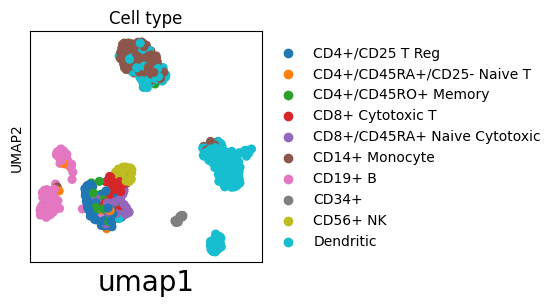

In [20]:
# Set title with the title parameter
# Return Axes to further modify the plot
ax = sc.pl.umap(adata, color="bulk_labels", title="Cell type", show=False)
# Modify xlabel
_ = ax.set_xlabel("umap1", fontsize=20)

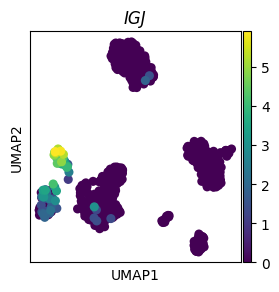

In [21]:
# Make title italic
ax = sc.pl.umap(adata, color="IGJ", show=False)
_ = ax.set_title("IGJ", style="italic")

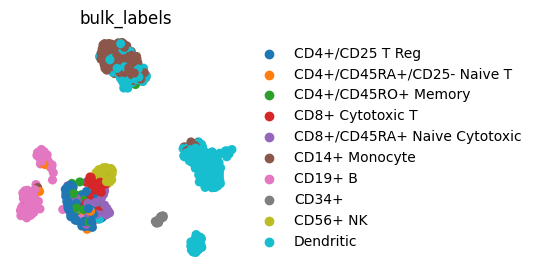

In [22]:
# Transparent background and no borders/axis labels with frameon=False
sc.pl.umap(adata, color="bulk_labels", frameon=False)

The color of individual axis labels can also be changed to highlight specific axis

Dotplot axes: {'mainplot_ax': <Axes: >, 'size_legend_ax': <Axes: title={'center': 'Fraction of cells\nin group (%)'}>, 'color_legend_ax': <Axes: title={'center': 'Mean expression\nin group'}>}


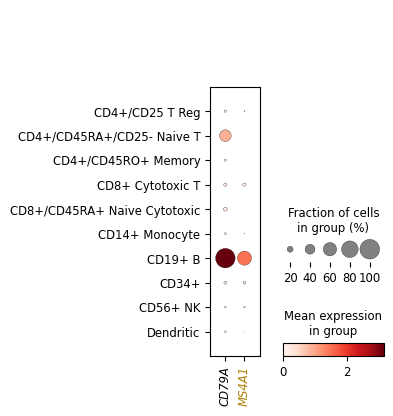

In [23]:
dp = sc.pl.dotplot(adata, ["CD79A", "MS4A1"], "bulk_labels", show=False)
# All Axes used in dotplot
print("Dotplot axes:", dp)
# Select the Axes object that contains the subplot of interest
ax = dp["mainplot_ax"]
# Loop through ticklabels and make them italic
for l in ax.get_xticklabels():
    l.set_style("italic")
    g = l.get_text()
    # Change settings (e.g. color) of certain ticklabels based on their text (here gene name)
    if g == "MS4A1":
        l.set_color("#A97F03")
    

#### Labels and Legends

Labels and legends can also be customized similarily to axes

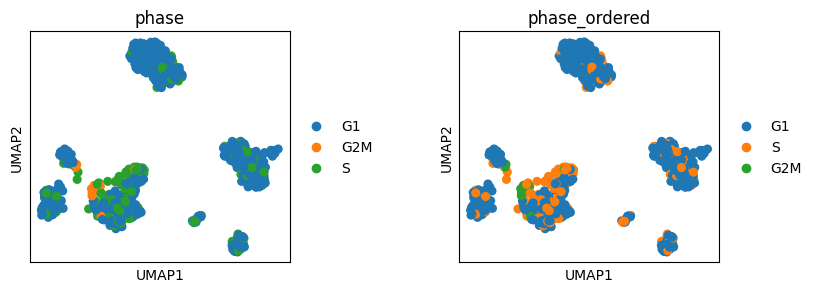

In [24]:
# The default ordering of cell cycle phases is alphabetical
# To ensure that the ordering corresponds to cell cycle define order of categories;
# this should include all categories in the corresponding pandas table column
phases = ["G1", "S", "G2M"]
adata.obs["phase_ordered"] = pd.Categorical(
    values=adata.obs.phase, categories=phases, ordered=True
)
sc.pl.umap(adata, color=["phase", "phase_ordered"], wspace=0.5)
# This just removes the newly added ordered column from adata as we do not need it below
adata.obs.drop("phase_ordered", axis=1, inplace=True)

Changine legend tile and moving

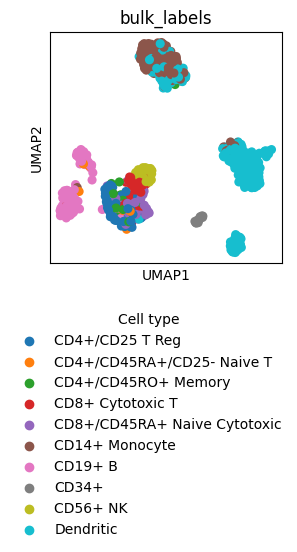

In [25]:
fig = sc.pl.umap(adata, color=["bulk_labels"], return_fig=True)
ax = fig.axes[0]
ax.legend_.set_title("Cell type")
# Change Legend location
ax.legend_.set_bbox_to_anchor((-0.2, -0.7))

We can also add a custom legend by replacing the one in the plot

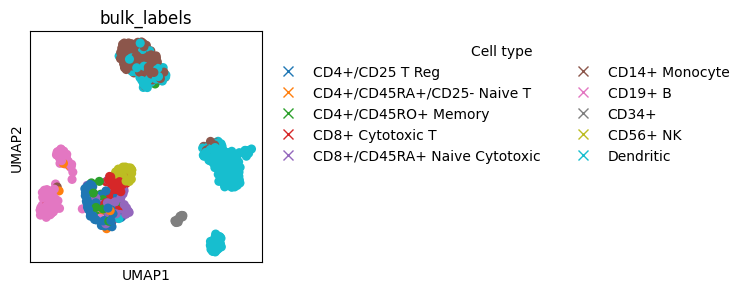

In [31]:
fig = sc.pl.umap(adata, color=["bulk_labels"], return_fig=True)
ax = fig.axes[0]
# Remove original legend
ax.legend_.remove()

# Make new Legend
l1 = ax.legend(
    #Add legened element for each color group
    handles=[
        Line2D(
            [0],
            [0],
            marker="x",
            color=c,
            lw=0,
            label=l,
            markerfacecolor=c,
            markersize=7,
        )

        for l, c in zip(
            list(adata.obs.bulk_labels.cat.categories), adata.uns["bulk_labels_colors"]
        )
    ],

    frameon=False,
    ncols=2,
    bbox_to_anchor=(1,1),
    title="Cell type",
)

## Annotating Scatter Plots

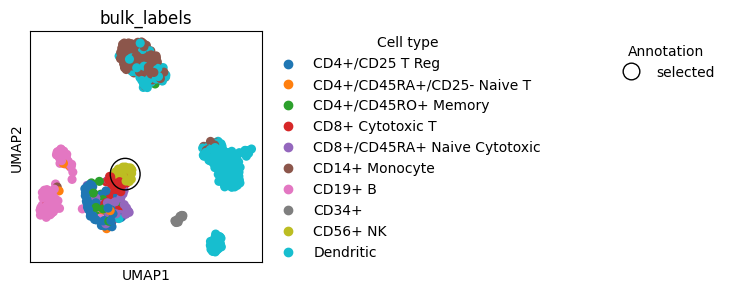

In [32]:
fig, ax = plt.subplots(figsize=(3, 3))
sc.pl.umap(adata, color=["bulk_labels"], ax=ax, show=False)

# Encircle part of the plot

# Find location on the plot where circle should be added
location_cells = adata[adata.obs.bulk_labels == "CD56+ NK", :].obsm["X_umap"]
x = location_cells[:, 0].mean()
y = location_cells[:, 1].mean()
size = 1.5  # Set circle size
# Plot circle
circle = plt.Circle((x, y), size, color="k", clip_on=False, fill=False)
ax.add_patch(circle)

# Add annother Legend for the mark

# Save the original Legend
l1 = ax.get_legend()
l1.set_title("Cell type")
# Make a new Legend for the mark
l2 = ax.legend(
    handles=[
        Line2D(
            [0],
            [0],
            marker="o",
            color="k",
            markerfacecolor="none",
            markersize=12,
            markeredgecolor="k",
            lw=0,
            label="selected",
        )
    ],
    frameon=False,
    bbox_to_anchor=(3, 1),
    title="Annotation",
)
# Add back the original Legend which was overwritten by the new Legend
_ = plt.gca().add_artist(l1)

Other packages can also be used to mark objects on plots such as adjustText

Axes: Axes(0.146628,0.15;0.568915x0.73)


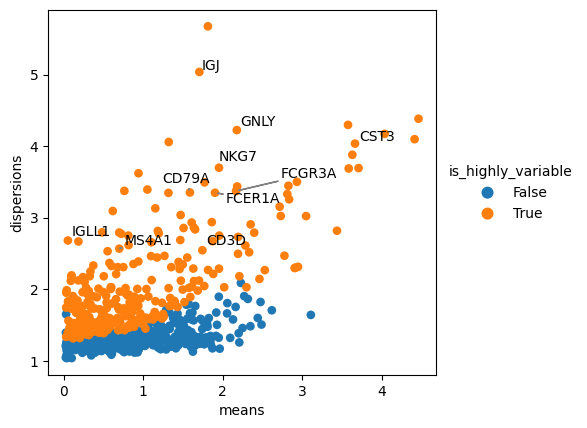

In [34]:
with plt.rc_context({"figure.figsize": (5, 5)}):
    x = "means"
    y = "dispersions"
    color = "is_highly_variable"
    adata.var["is_highly_variable"] = (
        adata.var["highly_variable"].astype(bool).astype(str)
    )
    ax = sc.pl.scatter(adata, x=x, y=y, color=color, show=False)
    print("Axes:", ax)
    # Move plot title from Axes to Legend
    ax.set_title("")
    ax.get_legend().set_title(color)

    # Labels

    # Select genes to be labeled
    texts = []
    genes = [
        "CD79A",
        "MS4A1",
        "FCER1A",
        "CST3",
        "FCGR3A",
        "GNLY",
        "NKG7",
        "IGLL1",
        "IGJ",
        "CD3D",
    ]
    for gene in genes:
        # Position of object to be marked
        x_loc = adata.var.at[gene, x]
        y_loc = adata.var.at[gene, y]
        # Text color
        color_point = "k"
        texts.append(ax.text(x_loc, y_loc, gene, color=color_point, fontsize=10))

    # Label selected genes on the plot
    _ = adjust_text(
        texts,
        expand=(1.2, 1.2),
        arrowprops=dict(color="gray", lw=1),
        ax=ax,
    )

## Colors

Colors for different categories can be defined using a dictionary

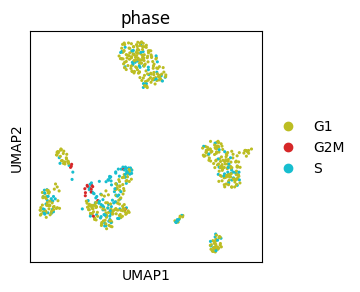

In [35]:
sc.pl.umap(
    adata,
    color="phase",
    s=20,
    palette={"S": "tab:cyan", "G1": "tab:olive", "G2M": "tab:red"},
)

For non-centered values virids palettes are recommended
- perceptually uniform
- colorblind friendly

For centered values diverging palettes are recommended
- center of palette can be set to match the center value

diverging palette can be centered using vcenter or using vmin and vmax to make the palette symetric

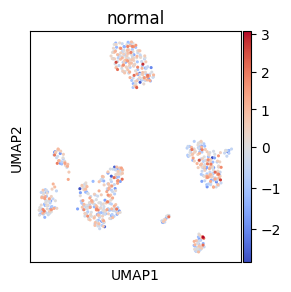

In [36]:
# Center palette with vcenter

# Make mock column for plotting, here we use random values from normal distribution
loc = 0
adata.obs["normal"] = np.random.normal(loc=loc, size=adata.shape[0])

# Center at mean (loc) of the distribution with vcenter parameter
sc.pl.umap(adata, color="normal", cmap="coolwarm", s=20, vcenter=loc)
adata.obs.drop("normal", axis=1, inplace=True)


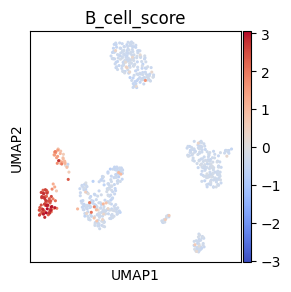

In [37]:
# Make symmetric palette with vmin and vmax

# Make mock column for plotting, here we use B cell score
sc.tl.score_genes(adata, ["CD79A", "MS4A1"], score_name="B_cell_score")

# To make a symmetric palette centerd around 0 we set vmax to maximal absolut value and vmin to
# the negative value of maxabs
maxabs = max(abs(adata.obs["B_cell_score"]))
sc.pl.umap(
    adata, color="B_cell_score", cmap="coolwarm", s=20, vmin=-maxabs, vmax=maxabs
)
adata.obs.drop("B_cell_score", axis=1, inplace=True)

Custom palettes with scaling(linear, log, exponential), value range normalization, centering, custom color combinations, and dynamic ranges are all supported

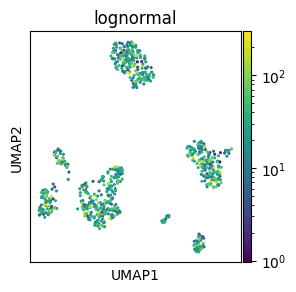

In [38]:
# Log-scaled palette

# Make mock column with log-normally distirbuited values
adata.obs["lognormal"] = np.random.lognormal(3, 1, adata.shape[0])

# Log scaling of the palette
norm = mcolors.LogNorm()
sc.pl.umap(adata, color="lognormal", s=20, norm=norm)

adata.obs.drop("lognormal", axis=1, inplace=True)

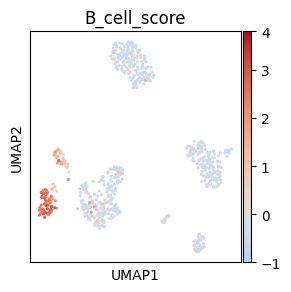

In [39]:
# Centered non-symmetric palette

# Make mock column for plotting, here we use B cell score
sc.tl.score_genes(adata, ["CD79A", "MS4A1"], score_name="B_cell_score")


# Palette normalization with centering and adapted dynamic range to correspond to
# the distance of vmin and vmax from the cenetr
# Adapted from https://stackoverflow.com/a/50003503
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        value = np.array(value).astype(float)
        normalized_min = max(
            0.0,
            0.5
            * (1.0 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))),
        )
        normalized_max = min(
            1.0,
            0.5
            * (1.0 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))),
        )
        normalized_mid = 0.5
        x, y = (
            [self.vmin, self.midpoint, self.vmax],
            [normalized_min, normalized_mid, normalized_max],
        )
        return np.ma.masked_array(np.interp(value, x, y))


# Add padding arround vmin and vmax as Colorbar sets value limits to round numbers below and
# above the vmin and vmax, respectively, which means that they can not be assigned the correct
# color with our nomalisation function that is limited to vmin and vmax
# However, this padding reduces the dynamic range as we set a broad padding and
# then later discard values that are not needed for the rounding up and down
# of the vmin and vmax on the Colorbar, respectively
vmin = adata.obs["B_cell_score"].min()
vmax = adata.obs["B_cell_score"].max()
vpadding = (vmax - vmin) * 0.2
norm = MidpointNormalize(vmin=vmin - vpadding, vmax=vmax + vpadding, midpoint=0)
# Plot umap
fig = sc.pl.umap(
    adata,
    color="B_cell_score",
    cmap="coolwarm",
    s=20,
    norm=norm,
    return_fig=True,
    show=False,
)
# Adjust Colorbar ylim to be just outside of vmin,vmax and not far outside of this range
# as the padding we set initially may be too broad
cmap_yticklabels = np.array([t._y for t in fig.axes[1].get_yticklabels()])
fig.axes[1].set_ylim(
    max(cmap_yticklabels[cmap_yticklabels < vmin]),
    min(cmap_yticklabels[cmap_yticklabels > vmax]),
)

adata.obs.drop("B_cell_score", axis=1, inplace=True)

## UMAP Customization

#### Coloring cell subset

All cells can be plotted with an individual cell group on top in a colour
This can also be done with continuous values of an individual cell group

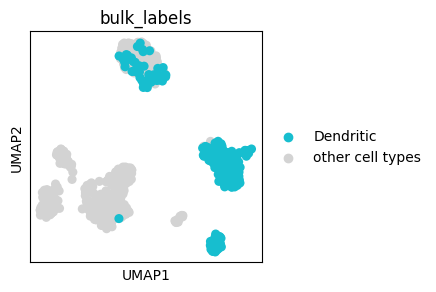

In [40]:
ax = sc.pl.umap(adata, color=["bulk_labels"], groups=["Dendritic"], show=False)

# We can change the 'NA' in the legend that represents all cells outside of the
# specified groups
legend_texts = ax.get_legend().get_texts()
# Find legend object whose text is "NA" and change it
for legend_text in legend_texts:
    if legend_text.get_text() == "NA":
        legend_text.set_text("other cell types")

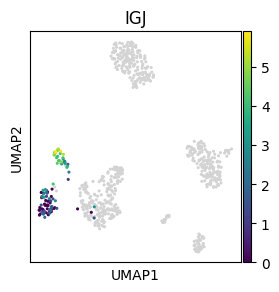

In [41]:
sc.pl.umap(adata, color="IGJ", mask_obs=(adata.obs.bulk_labels == "CD19+ B"), size=20)

#### Cell ordering

Embedding allows sorting based on continuous value to plot cells with highest score on top

For categorical values cells are plotted in the same order they are stored in anndata. So when two objects are concatenated one batch will be displayed overtop of the other
To fix this we use random reordering

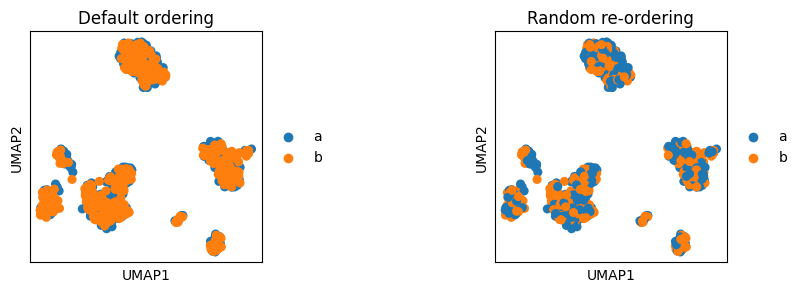

In [42]:
# Make two batches in the adata object for the plot example
adata.obs["batch"] = ["a"] * int(adata.shape[0] / 2) + ["b"] * (
    adata.shape[0] - int(adata.shape[0] / 2)
)

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(wspace=1)
sc.pl.umap(adata, color="batch", ax=axs[0], title="Default ordering", show=False)
# Randomly order cells by making a random index and subsetting AnnData based on it
# Set a random seed to ensure that the cell ordering will be reproducible
np.random.seed(0)
random_indices = np.random.permutation(list(range(adata.shape[0])))
sc.pl.umap(
    adata[random_indices, :], color="batch", ax=axs[1], title="Random re-ordering"
)

#### Optimizing UMAP Layout

UMAP layout can adjust to put the cells in more tight or dispersed structures

c:\Users\chpar\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1394: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\Users\chpar\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1394: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\Users\chpar\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1400: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covar = curve_fit(curve, xv, yv)
c:\Users\chpar\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1394: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\Users\chpar\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1394: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


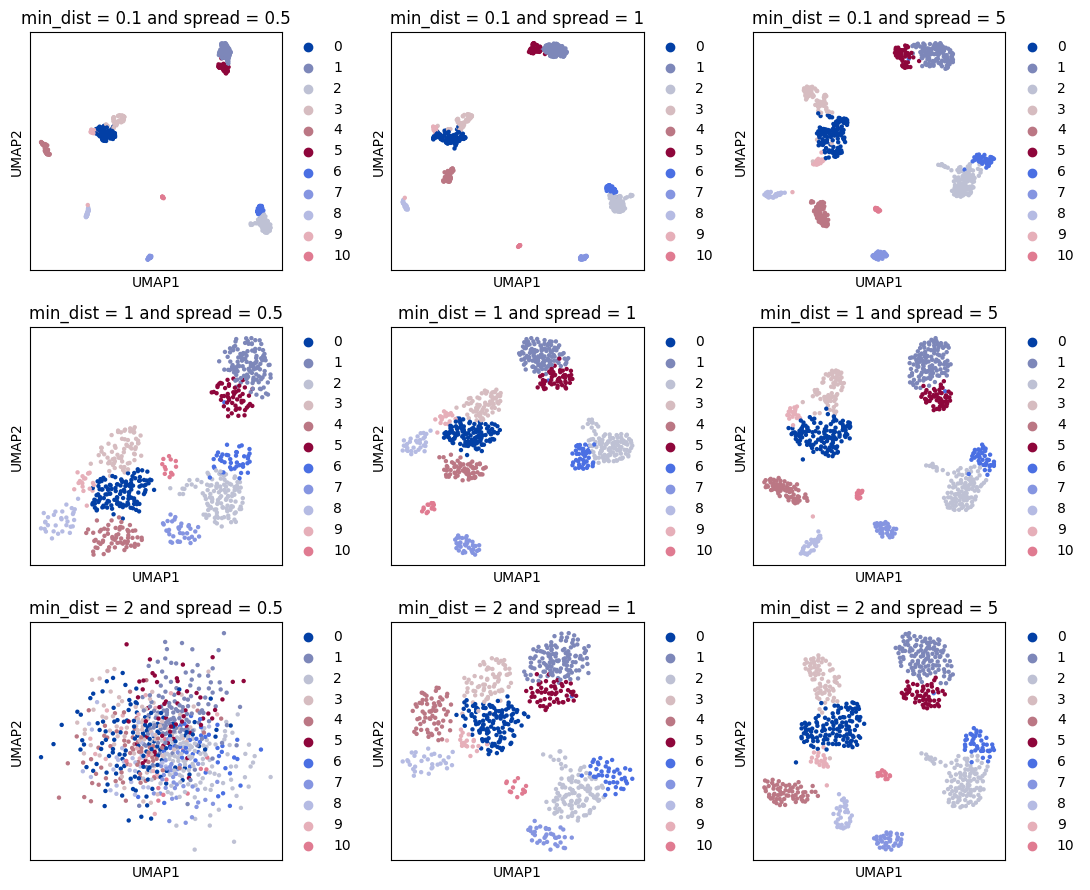

In [43]:
# Copy adata not to modify UMAP in the original adata object
adata_temp = adata.copy()
# Loop through different umap parameters, recomputting and replotting UMAP for each of them
MIN_DISTS = [0.1, 1, 2]
SPREADS = [0.5, 1, 5]
# Create grid of plots, with a little extra room for the legends
fig, axes = plt.subplots(
    len(MIN_DISTS), len(SPREADS), figsize=(len(SPREADS) * 3 + 2, len(MIN_DISTS) * 3)
)

for (i, min_dist), (j, spread) in product(enumerate(MIN_DISTS), enumerate(SPREADS)):
    ax = axes[i][j]
    param_str = " ".join(["min_dist =", str(min_dist), "and spread =", str(spread)])
    # Recompute UMAP with new parameters
    sc.tl.umap(adata_temp, min_dist=min_dist, spread=spread)
    # Create plot, placing it in grid
    sc.pl.umap(
        adata_temp,
        color=["louvain"],
        title=param_str,
        s=40,
        ax=ax,
        show=False,
    )
plt.tight_layout()
plt.show()
plt.close()
del adata_temp

## PAGAs

PAGAs can be customized by removed weak edges based on edge weight distribution

Layout is optemized to correspond to the PAGA connectivities, this can be adjusted using the pos argument

PAGA dot centers can be set to the mean of the UMAP embedding values to form corresponding groups



Tutorial Link: https://scanpy-tutorials.readthedocs.io/en/latest/plotting/advanced.html#